In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-eligible-dataset/loan-train.csv
/kaggle/input/loan-eligible-dataset/loan-test.csv


In [2]:
df_test=pd.read_csv('/kaggle/input/loan-eligible-dataset/loan-test.csv')

In [3]:
df_train=pd.read_csv('/kaggle/input/loan-eligible-dataset/loan-train.csv')

In [ ]:
df_test.shape

In [ ]:
df_test.isnull().sum()

In [ ]:
df_train.isnull().sum()

In [ ]:
for column in df_train:
    print(f'{column}: {df_train[column].unique()}')

## Check column type

In [ ]:
df_train.dtypes

In [ ]:
df_train['CoapplicantIncome','Loan_Amount_Term','LoanAmount']=pd.to_numeric(df_train['CoapplicantIncome','Loan_Amount_Term','LoanAmount'])

In [ ]:
df_train.describe()

## NaN values

In [ ]:
df_train.isnull().sum()

In [4]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)


/tmp/ipykernel_33/3823584675.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
/tmp/ipykernel_33/3823584675.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [6]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## EDA

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.crosstab(df_train['Credit_History'], df_train['Loan_Status'], margins=True)

In [ ]:
df_train.boxplot(column = 'ApplicantIncome')

In [ ]:
df_train['ApplicantIncome'].plot(kind='hist',bins=20)

In [ ]:
df_train.boxplot(column='ApplicantIncome', by="Education")

In [ ]:
df_train['CoapplicantIncome'].plot(kind='hist',bins=20)

In [7]:
df_train['TotalIncome']=df_train['ApplicantIncome']+df_train['CoapplicantIncome']

In [ ]:
df_train['TotalIncome'].plot(kind='hist',bins=20)

We can see that we have outliers we gonna fix it later on

In [ ]:
df_train['LoanAmount'].plot(kind='hist',bins=20)

To fix the outliers we gonna use zscore technique

In [ ]:
(df_train['LoanAmount']-df_train['LoanAmount'].mean())/df_train['LoanAmount'].std()

In [ ]:
def zscore(df):
    return (df-df.mean())/df.std()

In [ ]:
zscore(df_train['LoanAmount'])

In [ ]:
df_train['LoanAmount'][zscore(df_train['LoanAmount'])<3]

In [ ]:
df_train['LoanAmount'][zscore(df_train['LoanAmount'])<3].plot(kind='hist',bins=20)

In [ ]:
df_train['TotalIncome'][zscore(df_train['TotalIncome'])<3]

In [5]:
df_train['TotalIncome'][zscore(df_train['TotalIncome'])<3].plot(kind='hist',bins=20)

KeyError: 'TotalIncome'

In [ ]:
df_train.boxplot(column='TotalIncome', by="Gender")

In [ ]:
df_train.boxplot(column='TotalIncome', by="Self_Employed")

## Handling categorical data

In [8]:
yes_no_col=['Gender','Married','Education','Self_Employed','Loan_Status']
for col in yes_no_col:
    df_train[col].replace({'No':0,'Yes':1},inplace=True)
    df_train[col].replace({'N':0,'Y':1},inplace=True)
    df_train[col].replace({'Female':0,'Male':1},inplace=True)
    df_train[col].replace({'Not Graduate':0,'Graduate':1},inplace=True)

/tmp/ipykernel_33/3227570493.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train[col].replace({'Female':0,'Male':1},inplace=True)
/tmp/ipykernel_33/3227570493.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train[col].replace({'No':0,'Yes':1},inplace=True)
/tmp/ipykernel_33/3227570493.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermedia

In [9]:
df_train=pd.get_dummies(df_train,columns=['Property_Area'])

In [10]:
df_train=pd.get_dummies(df_train,columns=['Dependents'])

In [11]:
df_train=df_train.replace({True:1,False:0})

/tmp/ipykernel_33/610324074.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train=df_train.replace({True:1,False:0})


In [12]:
df_train.head(5)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,1,0,1,0,5849,0.0,146.412162,360.0,1.0,1,5849.0,0,0,1,1,0,0,0
1,LP001003,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,6091.0,1,0,0,0,1,0,0
2,LP001005,1,1,1,1,3000,0.0,66.000000,360.0,1.0,1,3000.0,0,0,1,1,0,0,0
3,LP001006,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,1,4941.0,0,0,1,1,0,0,0
4,LP001008,1,0,1,0,6000,0.0,141.000000,360.0,1.0,1,6000.0,0,0,1,1,0,0,0


## Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
col_to_scale=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','TotalIncome']
scaler=MinMaxScaler()
df_train[col_to_scale]=scaler.fit_transform(df_train[col_to_scale])
df_train.head(4)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,1,0,1,0,0.070489,0.000000,0.198860,0.74359,1.0,1,0.055394,0,0,1,1,0,0,0
1,LP001003,1,1,1,0,0.054830,0.036192,0.172214,0.74359,1.0,0,0.058435,1,0,0,0,1,0,0
2,LP001005,1,1,1,1,0.035250,0.000000,0.082489,0.74359,1.0,1,0.019583,0,0,1,1,0,0,0
3,LP001006,1,1,0,0,0.030093,0.056592,0.160637,0.74359,1.0,1,0.043980,0,0,1,1,0,0,0


## Train and Test data split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X=df_train.drop(columns=['Loan_Status','Loan_ID'])
y=df_train['Loan_Status']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [ ]:
X_train.shape

## Training Models

### DecisionTree

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import tree

In [ ]:
tree.plot_tree(clf)

In [20]:
y_pred=clf.predict(X_test)

In [ ]:
y_test

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
cr=classification_report(y_test,y_pred)

Text(50.722222222222214, 0.5, 'Truth')

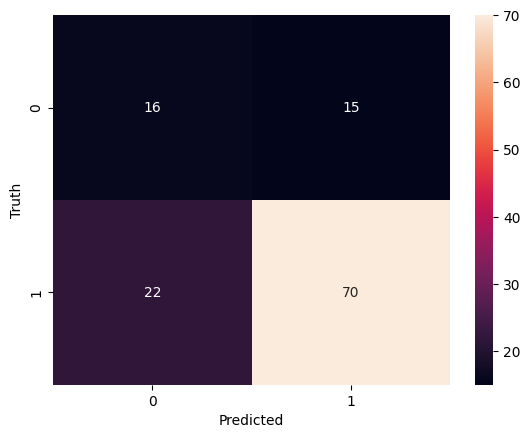

In [25]:
sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
print(cr)

              precision    recall  f1-score   support

           0       0.42      0.52      0.46        31
           1       0.82      0.76      0.79        92

    accuracy                           0.70       123
   macro avg       0.62      0.64      0.63       123
weighted avg       0.72      0.70      0.71       123



### GaussianNB

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred2 = gnb.fit(X_train, y_train).predict(X_test)

In [28]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.39      0.52        31
           1       0.82      0.97      0.89        92

    accuracy                           0.82       123
   macro avg       0.81      0.68      0.71       123
weighted avg       0.82      0.82      0.80       123



In [29]:
cm=confusion_matrix(y_test,y_pred2)

Text(50.722222222222214, 0.5, 'Truth')

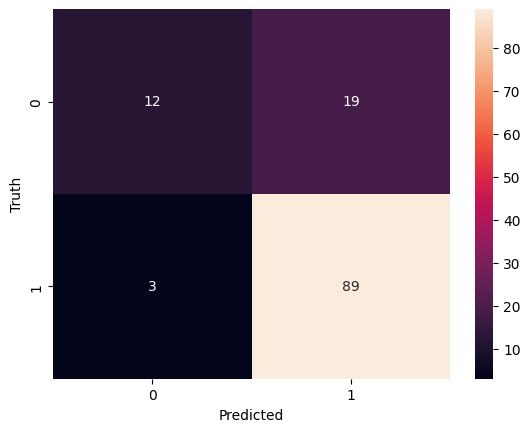

In [30]:
sns.heatmap(cm,fmt='d',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred3=clf.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.42      0.52      0.46        31
           1       0.82      0.76      0.79        92

    accuracy                           0.70       123
   macro avg       0.62      0.64      0.63       123
weighted avg       0.72      0.70      0.71       123



Text(50.722222222222214, 0.5, 'Truth')

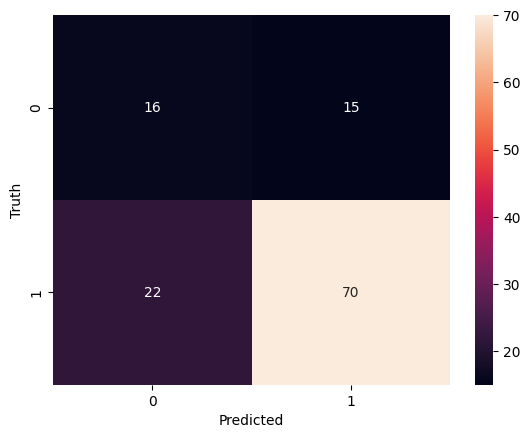

In [34]:
sns.heatmap(confusion_matrix(y_test,y_pred3),fmt='d',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100
                          ,oob_score=True,
                         max_samples=0.8,
                         random_state=0)
rf.fit(X_train,y_train)
rf.oob_score_

0.790224032586558

In [43]:
y_pred4=rf.predict(X_test)

Text(50.722222222222214, 0.5, 'Truth')

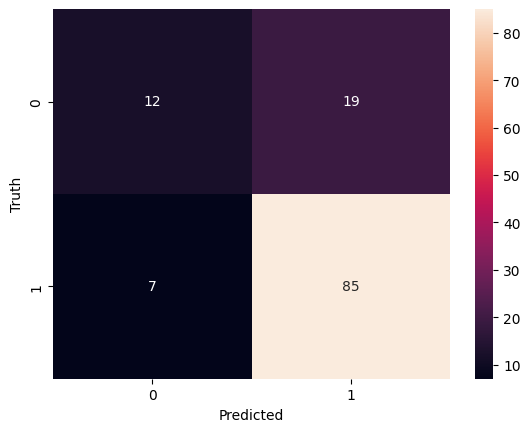

In [103]:
sns.heatmap(confusion_matrix(y_test,y_pred4),fmt='d',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [104]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.63      0.39      0.48        31
           1       0.82      0.92      0.87        92

    accuracy                           0.79       123
   macro avg       0.72      0.66      0.67       123
weighted avg       0.77      0.79      0.77       123



### SVC

In [97]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',gamma='scale',C=1)
svc.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [98]:
y_pred5=svc.predict(X_test)

In [99]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.83      0.99      0.90        92

    accuracy                           0.84       123
   macro avg       0.88      0.69      0.72       123
weighted avg       0.85      0.84      0.81       123



Text(50.722222222222214, 0.5, 'Truth')

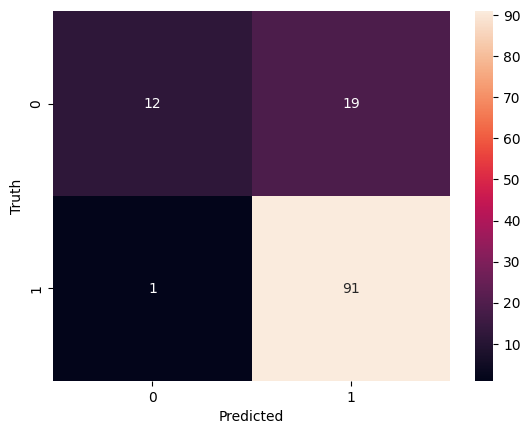

In [100]:
sns.heatmap(confusion_matrix(y_test,y_pred5),fmt='d',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Hyperparameter Tunning

##### We gonna do hyperparameter tunning on RandomForest and SVC models because they have the best scores

In [55]:
from sklearn.model_selection import GridSearchCV

In [89]:
gs_rf=GridSearchCV(RandomForestClassifier(),{'n_estimators':(100,120,150)},cv=6).fit(X_train,y_train)


In [62]:
gs_rf.predict(X_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [90]:
print(classification_report(y_test,gs_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.39      0.49        31
           1       0.82      0.93      0.87        92

    accuracy                           0.80       123
   macro avg       0.74      0.66      0.68       123
weighted avg       0.78      0.80      0.78       123



Text(50.722222222222214, 0.5, 'Truth')

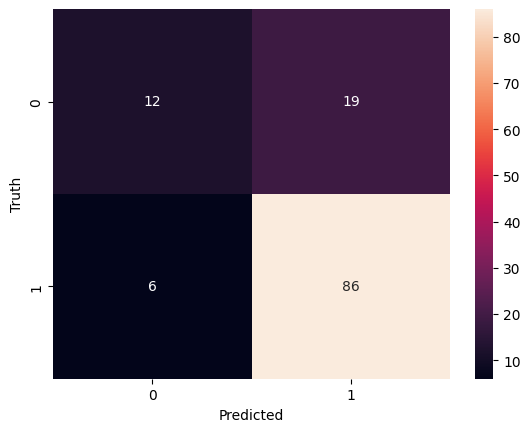

In [102]:
sns.heatmap(confusion_matrix(y_test,gs_rf.predict(X_test)),fmt='d',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [91]:
gs_rf.best_params_

{'n_estimators': 150}

In [92]:
gs_rf.best_score_

0.8023938572719059

In [93]:
gs_svc=GridSearchCV(SVC(),{'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
                          'gamma':('scale','auto'),
                          'C':(1,5,10)},cv=5).fit(X_train,y_train)


In [94]:
print(classification_report(y_test,gs_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.83      0.99      0.90        92

    accuracy                           0.84       123
   macro avg       0.88      0.69      0.72       123
weighted avg       0.85      0.84      0.81       123



Text(50.722222222222214, 0.5, 'Truth')

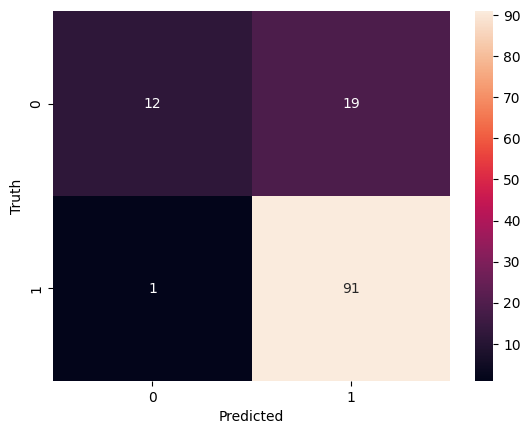

In [101]:
sns.heatmap(confusion_matrix(y_test,gs_svc.predict(X_test)),fmt='d',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [84]:
df=pd.DataFrame(gs_svc.cv_results_)


In [85]:
df[['param_C','param_kernel','param_gamma','mean_test_score']].head(5)

,param_C,param_kernel,param_gamma,mean_test_score
0,1,linear,scale,0.802536
1,1,poly,scale,0.790332
2,1,rbf,scale,0.802536
3,1,sigmoid,scale,0.676273
4,1,linear,auto,0.802536


In [95]:
gs_svc.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [96]:
gs_svc.best_score_

0.8025355596784168

In [105]:
import pickle
model_filepath = '/kaggle/working/model.pkl'

with open(model_filepath, 'wb') as file:
    pickle.dump(svc, file)

print(f"Model saved to {model_filepath}")

Model saved to /kaggle/working/model.pkl


## Models Comparison

In [113]:
from sklearn.metrics import accuracy_score

0.8373983739837398

In [118]:
def calculate_and_display_accuracy(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy:.4f}")

model_names = ['DecisionTree', 'GaussianNB', 'LogisticRegression', 'RandomForest', 'SVC']
y_pred_list = [y_pred,y_pred2,y_pred3,gs_rf.predict(X_test),y_pred5]  

for i, model_name in enumerate(model_names):
    y_pred = y_pred_list[i]
    calculate_and_display_accuracy(y_test, y_pred, model_name)

Accuracy for DecisionTree: 0.8374
Accuracy for GaussianNB: 0.8211
Accuracy for LogisticRegression: 0.6992
Accuracy for RandomForest: 0.7967
Accuracy for SVC: 0.8374
